In [283]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.ticker as mticker

In [284]:
# Import Data
data_path = "../data/PET_CONS_WPSUP_K_W.xls"
df_supProducts = pd.read_excel(data_path, sheet_name="Data 1", skiprows=2, index_col='Date')


In [285]:
# Data Cleaning
df_supProducts.columns = df_supProducts.columns.str.replace(r'\b(?:Weekly U.S. Product Supplied of)\b', '', regex=True).str.strip()
df_supProducts.index = pd.to_datetime(df_supProducts.index, errors='coerce', format='%Y-%m-%d')
df_supProducts.iloc[:, 1:] = df_supProducts.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

In [286]:
def fiveYear_plot(df, numeric_col):
    # Get the current year
    current_year = datetime.now().year
    
    # Calculate the start date (5 years ago) and end date (end of the current year)
    start_date = f'{current_year - 5}-01-01'  # 5 years ago from the current year
    end_date = f'{current_year}-12-31'  # End of the current year

    # Convert the numeric column to numeric, forcing errors to NaN
    df[numeric_col] = pd.to_numeric(df[numeric_col], errors='coerce')
    
    # Extract Year, Month, and Week for grouping
    df['Year'] = df.index.year
    df['Week'] = df.index.isocalendar().week
    
    # Filter the DataFrame for the last 5 years (including the current year)
    df_filtered = df[(df.index >= start_date) & (df.index <= end_date)]
    
    # Group by Week and calculate max, min, mean (for the 5-year range)
    five_year_data = df_filtered.groupby('Week')[numeric_col].agg(['max', 'min', 'mean']).rename(columns={'mean': '5Y Avg.'})
    
    # Calculate 2023 and 2024 values (grouped by week)
    value_2023 = df[df['Year'] == 2023].groupby('Week')[numeric_col].mean()
    value_2024 = df[df['Year'] == 2024].groupby('Week')[numeric_col].mean()
    
    # Create a new DataFrame for plotting
    plot_data = five_year_data.copy()
    plot_data['2023'] = value_2023
    plot_data['2024'] = value_2024
    
    # Ensure Numeric Data Types
    plot_data['max'] = pd.to_numeric(plot_data['max'], errors='coerce')
    plot_data['min'] = pd.to_numeric(plot_data['min'], errors='coerce')
    
    # Fill missing values with NaN
    plot_data['2023'] = plot_data['2023'].fillna(np.nan)
    plot_data['2024'] = plot_data['2024'].fillna(np.nan)
    
    # Remove Week 1 and Week 53
    plot_data = plot_data[(plot_data.index != 1) & (plot_data.index != 53)]
    
    # Ensure plot_data is sorted by index (Week)
    plot_data = plot_data.sort_index()
    
    # Create a numerical range for the x-axis based on the length of the DataFrame
    x_values = np.arange(len(plot_data))

    # Plotting
    plt.figure(figsize=(12, 6))
    
    # Plot the 5-Year Max/Min range as a shaded area
    plt.fill_between(x_values, plot_data['max'], plot_data['min'], color='lightgray', label='5-Year Range')
    
    # Colors
    fiveYear_avgColor = "black"
    fiveYear_2023Color = "#FFA500"
    fiveYear_2024Color = "#003366"
    
    
    # Plot the 5-Year Average
    plt.plot(plot_data.index, plot_data['5Y Avg.'], color=fiveYear_avgColor, linestyle='--', label='5-Year Average', linewidth=1)
    
    # Plot the 2023 values
    plt.plot(plot_data.index, plot_data['2023'], color=fiveYear_2023Color, label='2023', linewidth=1.5, alpha=0.7)
    
    # Plot the 2024 values
    plt.plot(plot_data.index, plot_data['2024'], color=fiveYear_2024Color, marker='o', label='2024', linewidth=2)
    
    # Replace "OldWord" with "NewWord" in numeric_col
    title_chart = numeric_col.replace("(Thousand Barrels per Day)", " ")
    
    # Formatting the chart
    plt.title(f'Seasonal Trends of {title_chart} ', fontsize=16)
    plt.xlabel('Week', fontsize=14)
    plt.ylabel("Thousand Barrels per Day", fontsize=14)
    
    # Improve the y-axis to show values in the format '10.000', '20.000', etc.
    def thousands(x, pos):
        """Format the y-axis values with a dot as the thousand separator."""
        return f'{int(x):,}'.replace(',', '.')  # Format as '10.000', '20.000', etc.


    # Set the y-axis formatter
    plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(thousands))
    
    plt.legend()
    plt.grid()
    plt.tight_layout()
    
    # Add source text at the bottom right of the plot
    plt.text(0.95, -0.2, 'Source: EIA', transform=plt.gca().transAxes, fontsize=10, ha='right', va='bottom')

    
    # Save the figure as an image file
    plt.savefig('../report/five_year_max_min_range.png', format='png', dpi=300, bbox_inches='tight')
    
    # Show the plot
    plt.show()
    


    return plot_data


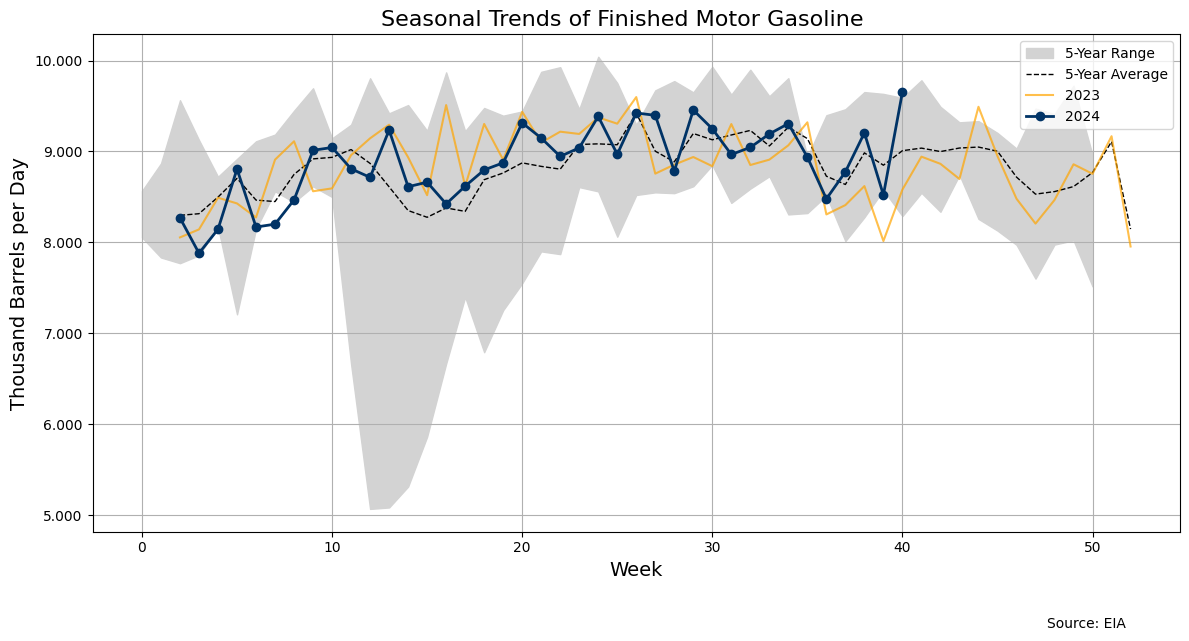

,max,min,5Y Avg.,2023,2024
Week,,,,,
2,8565.0,8054.0,8297.000000,8054.0,8269.0
3,8868.0,7833.0,8315.000000,8142.0,7880.0
4,9564.0,7770.0,8498.000000,8491.0,8144.0
5,9126.0,7857.0,8704.000000,8428.0,8807.0
6,8722.0,8168.0,8464.833333,8274.0,8168.0
7,8918.0,7207.0,8448.666667,8910.0,8200.0
8,9112.0,8148.0,8747.666667,9112.0,8467.0
9,9186.0,8562.0,8918.500000,8562.0,9013.0
10,9449.0,8442.0,8935.500000,8594.0,9044.0


In [287]:
# Call the function with the example DataFrame
fiveYear_plot(df_supProducts, df_supProducts.columns[1])
